# import

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from common_helper import *
from ord_helper import *
from nltk_helper import *

# data load & preprocessing

In [2]:
train_dr = "../input/train.json"
test_dr = "../input/test.json"
traindf, testdf = data_load(train_dr, test_dr)
x_train, y_train = data_preprocessing(traindf)
x_test, _ = data_preprocessing(testdf)

# 데이터 분리

In [3]:
select_number = 15

long_train_index = traindf[traindf['ingredients'].str.len() > select_number].index
short_train_index = traindf[traindf['ingredients'].str.len() <= select_number].index

long_test_index = testdf[testdf['ingredients'].str.len() > select_number].index
short_test_index = testdf[testdf['ingredients'].str.len() <= select_number].index

long_x_id = testdf[testdf['ingredients'].str.len() > select_number]['id'].values
short_x_id = testdf[testdf['ingredients'].str.len() <= select_number]['id'].values

long_x_train = np.array(x_train)[long_train_index]
short_x_train = np.array(x_train)[short_train_index]

long_y_train = np.array(y_train)[long_train_index]
short_y_train = np.array(y_train)[short_train_index]

long_x_test = np.array(x_test)[long_test_index]
short_x_test = np.array(x_test)[short_test_index]

# vectorizer

In [4]:
long_x_train = data_vectorizer(long_x_train)
short_x_train = data_vectorizer(short_x_train)

long_x_test = data_vectorizer(long_x_test)
short_x_test = data_vectorizer(short_x_test)

# visualization

/root/anaconda3/envs/ml_python/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/root/anaconda3/envs/ml_python/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


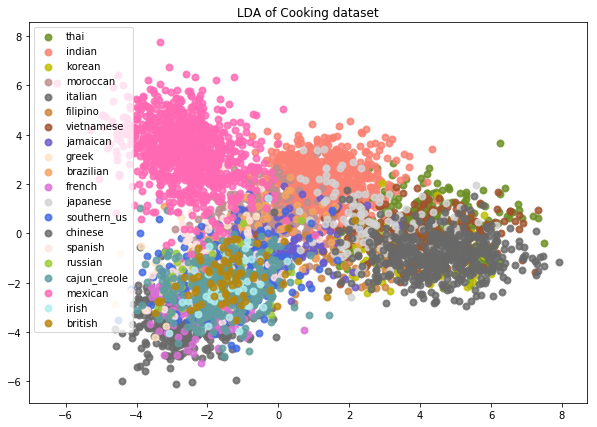

In [5]:
lda_visualization(long_x_train,traindf.loc[long_train_index].reset_index())

/root/anaconda3/envs/ml_python/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


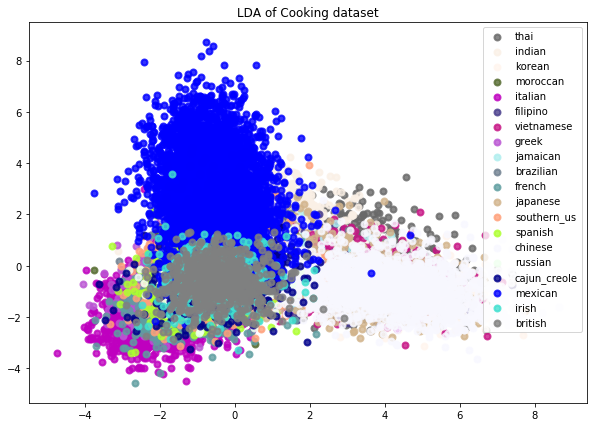

In [6]:
lda_visualization(short_x_train,traindf.loc[short_train_index].reset_index())

# model

In [7]:
long_clf = RandomForestClassifier(n_estimators=150)
long_clf.fit(long_x_train,long_y_train)
short_clf = MultinomialNB(alpha=0.1)
short_clf.fit(short_x_train,short_y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

# check & sumbit

In [15]:
check_predictions = long_clf.predict(long_x_train)
long_predictions = long_clf.predict(long_x_test)
print(accuracy_score(long_y_train, check_predictions))
check_predictions = short_clf.predict(short_x_train)
short_predictions = short_clf.predict(short_x_test)
print(accuracy_score(short_y_train, check_predictions))
testdf['id'] = long_x_id.tolist() + short_x_id.tolist()
predictions = np.concatenate((long_predictions, short_predictions), axis=0)
save_submission(testdf, predictions)

1.0
0.5910819825618819
저장했다.
